In [168]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.spatial.distance import cdist

In [169]:
y_pred: np.ndarray = np.linspace(-2, 2, 400)
y: float = 1.0

In [170]:
def squared_loss(y_pred: np.ndarray, y: float) -> np.ndarray:
    return (y_pred - y) ** 2 / 2
def logistic_loss(y_pred: np.ndarray, y: float) -> np.ndarray:
    return np.log(1 + np.exp(-y*y_pred))
def hinge_loss(y_pred: np.ndarray, y: float) -> np.ndarray:
    return np.maximum(np.zeros_like(y_pred), 1 - y*y_pred)
def zero_one_error(y_pred: np.ndarray, y: float) -> np.ndarray:
    return np.sign(y_pred) != y

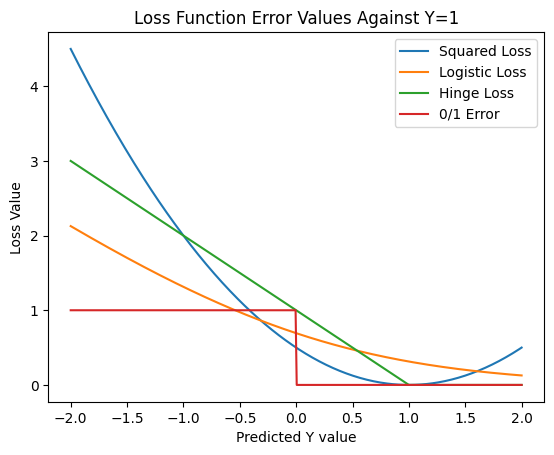

In [171]:
plt.plot(y_pred, squared_loss(y_pred, y), label="Squared Loss")
plt.plot(y_pred, logistic_loss(y_pred, y), label="Logistic Loss")
plt.plot(y_pred, hinge_loss(y_pred, y), label="Hinge Loss")
plt.plot(y_pred, zero_one_error(y_pred, y), label="0/1 Error")
plt.legend()
plt.title("Loss Function Error Values Against Y=1")
plt.xlabel("Predicted Y value")
plt.ylabel("Loss Value")
plt.show()

In [172]:
# 3 Classes
df: pd.DataFrame = pd.read_csv("dataset/data.csv", sep=";").drop(columns="Target")
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [173]:
X: np.ndarray = df.to_numpy()
X.shape

(4424, 36)

In [174]:
kmeans: KMeans = KMeans(n_clusters=4, n_init="auto", random_state=0).fit(X)
cluster_centers: np.ndarray = kmeans.cluster_centers_

In [175]:
pca: PCA = PCA(n_components=2).fit(X)
X_PCA: np.ndarray = pca.transform(X)
cluster_centers_PCA: np.ndarray = pca.transform(cluster_centers)

In [176]:
JL: np.ndarray = np.random.normal(size=((X.shape[1], 2)))
X_JL: np.ndarray = X.dot(JL)
cluster_centers_JL: np.ndarray = cluster_centers.dot(JL)

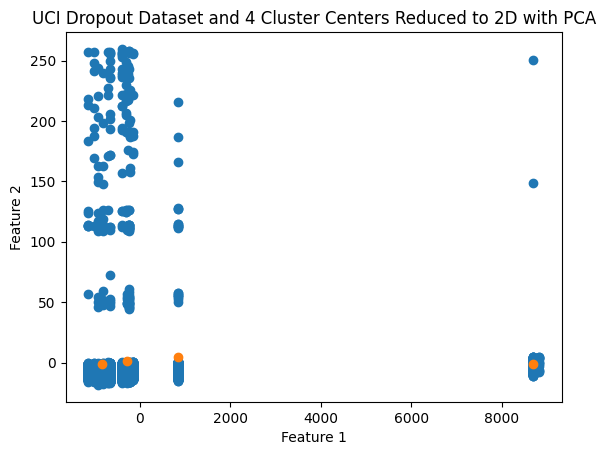

In [177]:
plt.scatter(X_PCA[:, 0], X_PCA[:, 1], label="Dataset")
plt.scatter(cluster_centers_PCA[:, 0], cluster_centers_PCA[:, 1], label="Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("UCI Dropout Dataset and 4 Cluster Centers Reduced to 2D with PCA")
plt.show()

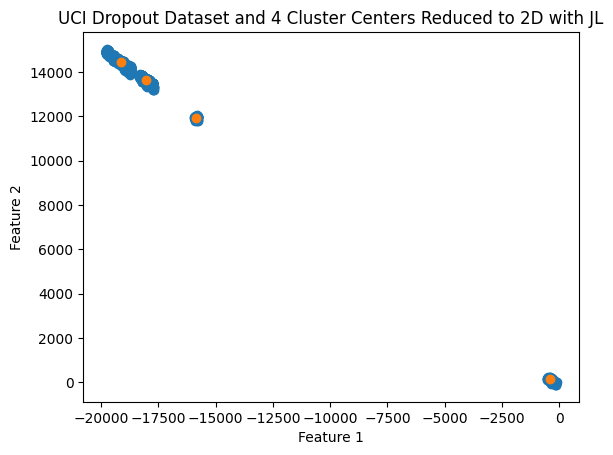

In [178]:
plt.scatter(X_JL[:, 0], X_JL[:, 1], label="Dataset")
plt.scatter(cluster_centers_JL[:, 0], cluster_centers_JL[:, 1], label="Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("UCI Dropout Dataset and 4 Cluster Centers Reduced to 2D with JL")
plt.show()

In [179]:
def closest_center_distances(X: np.ndarray, cluster_centers: np.ndarray, metric: str) -> np.ndarray:
    center_distances: np.ndarray = cdist(X, cluster_centers, metric)
    nearest_center_indices: np.ndarray = np.argmin(center_distances, axis=1)
    return center_distances[np.arange(len(X)), nearest_center_indices]

def representatives(X: np.ndarray, cluster_centers: np.ndarray, metric: str) -> np.ndarray:
    center_distances: np.ndarray = cdist(X, cluster_centers, metric)
    closest_reps: np.ndarray = np.argmin(center_distances, axis=0)
    return X[closest_reps]

def kmeans_cost(X: np.ndarray, cluster_centers: np.ndarray) -> float:
    nearest_distances: np.ndarray = closest_center_distances(X, cluster_centers, "sqeuclidean")
    return np.sum(nearest_distances)

def kmedoid_cost(X: np.ndarray, cluster_centers: np.ndarray, metric: str) -> float:
    cluster_representatives: np.ndarray = representatives(X, cluster_centers, metric)
    nearest_distances: np.ndarray = closest_center_distances(X, cluster_representatives, metric)
    return np.sum(nearest_distances)

def kcenter_cost(X: np.ndarray, cluster_centers: np.ndarray, metric: str) -> float:
    nearest_distances: np.ndarray = closest_center_distances(X, cluster_centers, metric)
    return np.max(nearest_distances)

In [180]:
print(f"K-Means Cost: {kmeans_cost(X, cluster_centers)}")
print(f"K-Medioid Cost: {kmedoid_cost(X, cluster_centers, 'cityblock')}")
print(f"K-Center Cost: {kcenter_cost(X, cluster_centers, 'cityblock')}")

K-Means Cost: 86157873.33658814
K-Medioid Cost: 941089.1211186317
K-Center Cost: 811.9779861444351


In [181]:
def generate_outliers(X: np.ndarray) -> np.ndarray:
    all_min: np.ndarray = np.min(X, axis=0)
    all_max: np.ndarray = np.max(X, axis=0)
    return np.vstack((
        2 * all_max,
        3 * all_max,
        4 * all_max,
        all_min / 2,
        all_min / 3,
        all_min / 4
    ))

In [182]:
X_outliers: np.ndarray = np.vstack((X, generate_outliers(X)))

In [183]:
kmeans_outliers: KMeans = KMeans(n_clusters=4, n_init="auto", random_state=0).fit(X_outliers)
cluster_centers_outliers: np.ndarray = kmeans_outliers.cluster_centers_

In [184]:
pca_outliers: PCA = PCA(n_components=2).fit(X_outliers)
X_outliers_PCA: np.ndarray = pca_outliers.transform(X_outliers)
cluster_centers_outliers_PCA: np.ndarray = pca_outliers.transform(cluster_centers_outliers)

In [185]:
JL_outliers: np.ndarray = np.random.normal(size=(X_outliers.shape[1], 2))
X_outliers_JL: np.ndarray = X_outliers.dot(JL)
cluster_centers_outliers_JL: np.ndarray = cluster_centers_outliers.dot(JL)

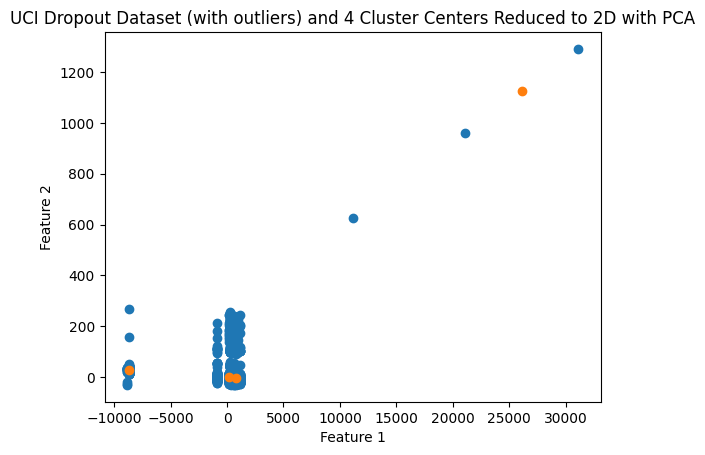

In [186]:
plt.scatter(X_outliers_PCA[:, 0], X_outliers_PCA[:, 1], label="Dataset")
plt.scatter(cluster_centers_outliers_PCA[:, 0], cluster_centers_outliers_PCA[:, 1], label="Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("UCI Dropout Dataset (with outliers) and 4 Cluster Centers Reduced to 2D with PCA")
plt.show()

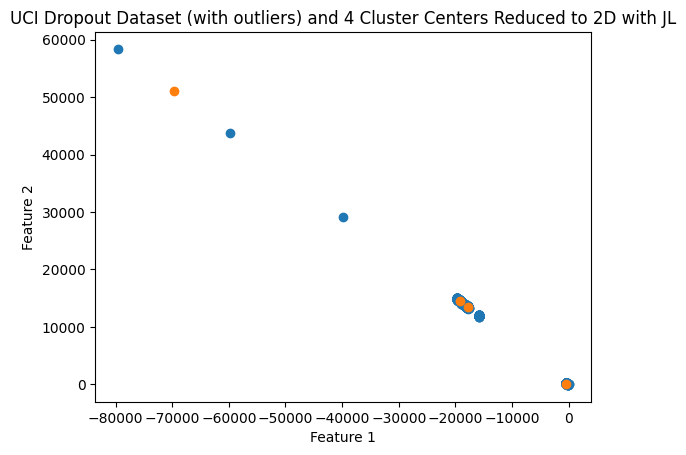

In [187]:
plt.scatter(X_outliers_JL[:, 0], X_outliers_JL[:, 1], label="Dataset")
plt.scatter(cluster_centers_outliers_JL[:, 0], cluster_centers_outliers_JL[:, 1], label="Cluster Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("UCI Dropout Dataset (with outliers) and 4 Cluster Centers Reduced to 2D with JL")
plt.show()

In [188]:
print(f"K-Means Cost: {kmeans_cost(X_outliers, cluster_centers_outliers)}")
print(f"K-Medioid Cost: {kmedoid_cost(X_outliers, cluster_centers_outliers, 'cityblock')}")
print(f"K-Center Cost: {kcenter_cost(X_outliers, cluster_centers_outliers, 'cityblock')}")

K-Means Cost: 489569918.27425957
K-Medioid Cost: 1246807.7821474276
K-Center Cost: 12759.373884164235


In [189]:
size: int = 1000
mean_x: int = 10
mean_y: int = 10
cov: list[list[int]] = [[5,0], [0, 5]]
four_gaussian_samples: np.ndarray = np.vstack((
    np.random.multivariate_normal(mean=[mean_x, mean_y], cov=[[5, 0], [0, 5]], size=size),
    np.random.multivariate_normal(mean=[mean_x, -mean_y], cov=[[5, 0], [0, 5]], size=size),
    np.random.multivariate_normal(mean=[-mean_x, -mean_y], cov=[[5, 0], [0, 5]], size=size),
    np.random.multivariate_normal(mean=[-mean_x, mean_y], cov=[[5, 0], [0, 5]], size=size),
))

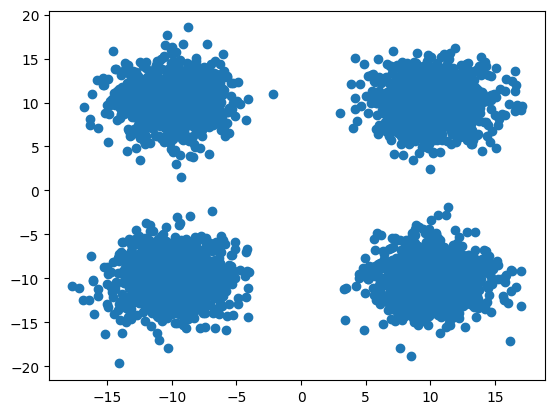

In [190]:
plt.scatter(four_gaussian_samples[:, 0], four_gaussian_samples[:, 1])
plt.show()

In [191]:
# Starting with offset so as to not initialize with perfectly optimal solution
cluster_init_x: int = mean_x + 1
cluster_init_y: int = mean_y + 1
init: list[list[int]] = [
    [cluster_init_x, cluster_init_y],
    [cluster_init_x, -cluster_init_y],
    [-cluster_init_x, -cluster_init_y],
    [-cluster_init_x, cluster_init_y]
]
kmeans_gaussian: KMeans = KMeans(n_clusters=4, init=init, n_init=1).fit(four_gaussian_samples)
cluster_centers_gaussian: np.ndarray = kmeans_gaussian.cluster_centers_

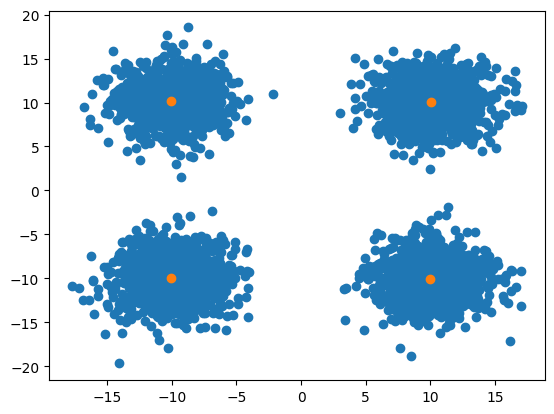

In [192]:
plt.scatter(four_gaussian_samples[:, 0], four_gaussian_samples[:, 1])
plt.scatter(cluster_centers_gaussian[:, 0], cluster_centers_gaussian[:, 1])
plt.show()

In [193]:
perturbed_init: list[list[int]] = [
    [10, 10],
    [10, 10],
    [10, 10],
    [10, 10]
]
kmeans_gaussian_perturbed: KMeans = KMeans(n_clusters=4, init=perturbed_init, n_init=1).fit(four_gaussian_samples)
cluster_centers_gaussian_perturbed: np.ndarray = kmeans_gaussian_perturbed.cluster_centers_

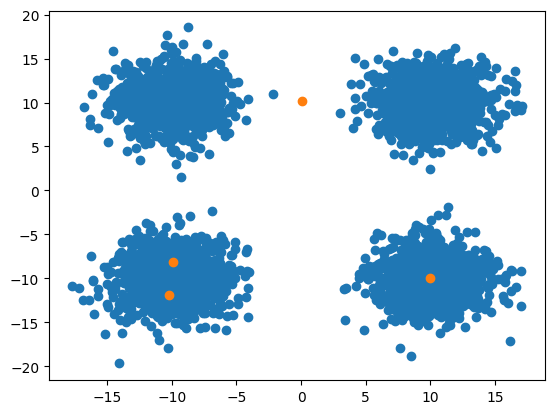

In [194]:
plt.scatter(four_gaussian_samples[:, 0], four_gaussian_samples[:, 1])
plt.scatter(cluster_centers_gaussian_perturbed[:, 0], cluster_centers_gaussian_perturbed[:, 1])
plt.show()